In [27]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = 'MTX'

In [28]:
adata = sc.read_10x_mtx(
    DATA_PATH,
    var_names='gene_symbols',
    gex_only=False,
    cache=True)

adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 72317 × 36636
    var: 'gene_ids', 'feature_types'

In [29]:
adata.var

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
IgD_TotalSeqB,IgD,Antibody Capture
IgM_TotalSeqB,IgM,Antibody Capture
LAG3_TotalSeqB,LAG3,Antibody Capture
TCRVa7.2_TotalSeqB,TCRVa7.2,Antibody Capture


In [30]:
adata.var.describe()

,gene_ids,feature_types
count,36636,36636
unique,36636,2
top,ENSG00000243485,Gene Expression
freq,1,36601


In [31]:
adata.var['feature_types'].value_counts()

feature_types
Gene Expression     36601
Antibody Capture       35
Name: count, dtype: int64

In [32]:
adata.var['Total counts'] = adata.X.sum(axis=0).A1

In [33]:
adata.var.describe()

,Total counts
count,3.663600e+04
mean,1.219822e+04
std,2.947327e+05
min,0.000000e+00
25%,1.000000e+00
50%,4.800000e+01
75%,1.911250e+03
max,3.084658e+07


In [34]:
adata.var

,gene_ids,feature_types,Total counts
MIR1302-2HG,ENSG00000243485,Gene Expression,0.0
FAM138A,ENSG00000237613,Gene Expression,0.0
OR4F5,ENSG00000186092,Gene Expression,0.0
AL627309.1,ENSG00000238009,Gene Expression,145.0
AL627309.3,ENSG00000239945,Gene Expression,9.0
...,...,...,...
IgD_TotalSeqB,IgD,Antibody Capture,1422630.0
IgM_TotalSeqB,IgM,Antibody Capture,7127866.0
LAG3_TotalSeqB,LAG3,Antibody Capture,41436.0
TCRVa7.2_TotalSeqB,TCRVa7.2,Antibody Capture,417350.0


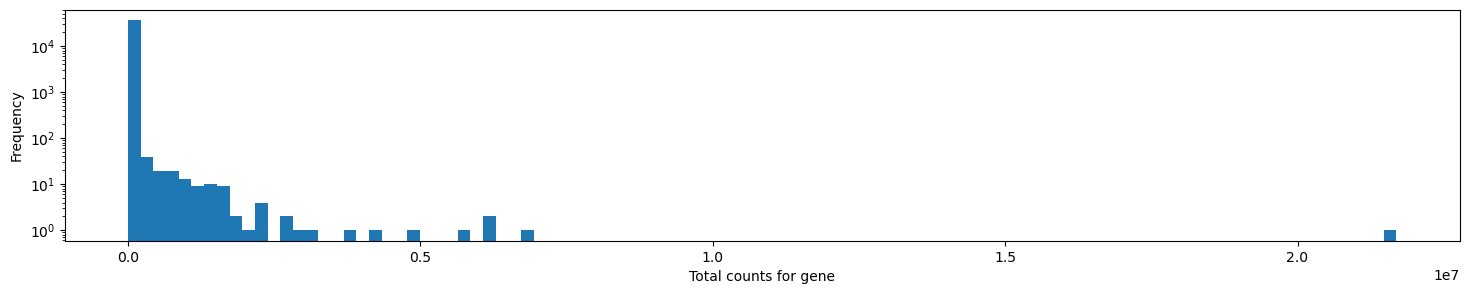

In [35]:
plt.figure(figsize=(18, 3))
adata.var[adata.var['feature_types'] == 'Gene Expression']['Total counts'].plot(kind='hist', bins=100, logy=True, logx=False)
plt.xlabel('Total counts for gene');

In [36]:
adata.var[adata.var['feature_types'] == 'Gene Expression'].describe()

,Total counts
count,3.660100e+04
mean,8.231513e+03
std,1.514445e+05
min,0.000000e+00
25%,1.000000e+00
50%,4.800000e+01
75%,1.888000e+03
max,2.168773e+07


c:\Users\giuli\anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


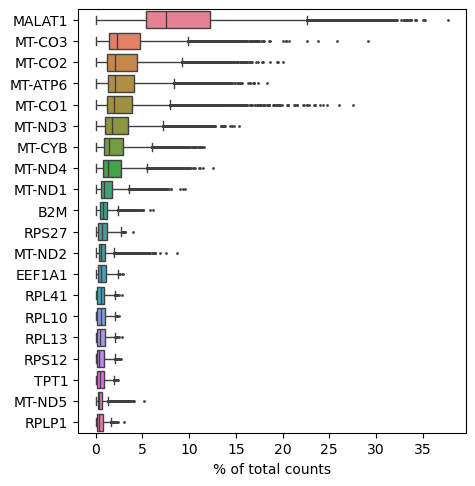

In [37]:
# visualize most highly expressed genes
sc.pl.highest_expr_genes(adata[:, adata.var['feature_types'] == 'Gene Expression'], n_top=20);

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


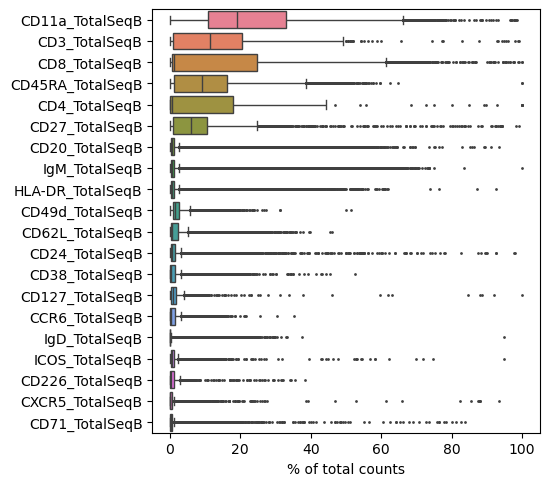

In [38]:
# visualize most highly expressed genes
sc.pl.highest_expr_genes(adata[:, adata.var['feature_types'] == 'Antibody Capture'], n_top=20);

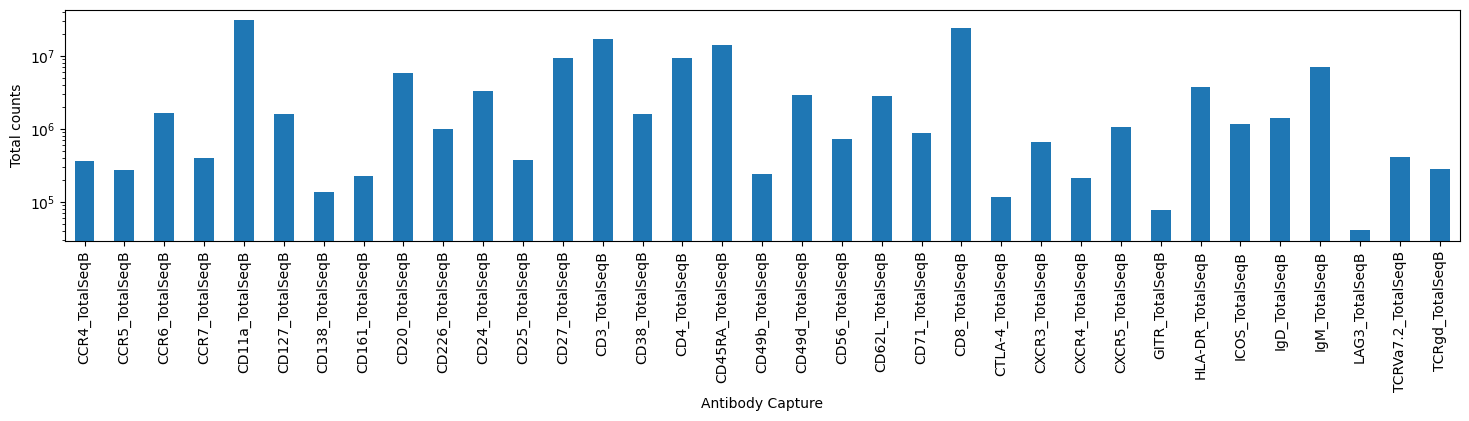

In [39]:
plt.figure(figsize=(18, 3))
adata.var[adata.var['feature_types'] == 'Antibody Capture']['Total counts'].plot(kind='bar', logy=True, logx=False)
plt.xlabel('Antibody Capture')
plt.ylabel('Total counts');

In [40]:
adata.obs['Total counts'] = adata.X.sum(axis=1).A1
adata.obs['Total counts antibody'] = adata[:, adata.var['feature_types'] == 'Antibody Capture'].X.sum(axis=1).A1
adata.obs['Total counts genes'] = adata[:, adata.var['feature_types'] == 'Gene Expression'].X.sum(axis=1).A1

In [41]:
adata.obs.describe()

,Total counts,Total counts antibody,Total counts genes
count,72317.000000,72317.000000,72317.000000
mean,6179.653809,2013.529541,4166.124023
std,4337.226074,2769.344482,2863.764160
min,314.000000,0.000000,311.000000
25%,3327.000000,1176.000000,1806.000000
50%,5464.000000,1650.000000,3433.000000
75%,8303.000000,2373.000000,6084.000000
max,302567.000000,283990.000000,40142.000000


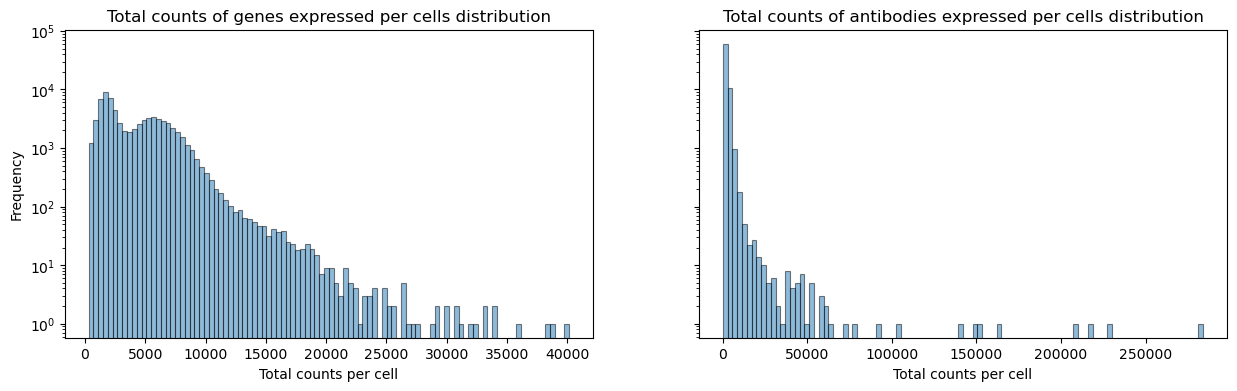

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharey=True)
adata.obs['Total counts genes'].plot(kind='hist', bins=100, logy=True, logx=False, ax=axs[0],
    edgecolor='black', linewidth=0.8, alpha=0.5)
axs[0].set_title('Total counts of genes expressed per cells distribution')
adata.obs['Total counts antibody'].plot(kind='hist', bins=100, logy=True, logx=False, ax=axs[1],
    edgecolor='black', linewidth=0.8, alpha=0.5)
axs[1].set_title('Total counts of antibodies expressed per cells distribution')
axs[0].set_xlabel('Total counts per cell')
axs[1].set_xlabel('Total counts per cell')
plt.show()

In [43]:
PATH = 'GSE239626'

adata = sc.read(PATH)

In [44]:
adata

AnnData object with n_obs × n_vars = 72317 × 36601
    obs: 'dataset', 'disease', 'cell_type', 'patiens', 'patiens_id', 'time'
    var: 'gene_ids', 'feature_types'

In [45]:
adata.obs

,dataset,disease,cell_type,patiens,patiens_id,time
AAACCCAAGACTGTTC-1,GSE239626,MS,PBMC,GSM7669046,N1,J0
AAACCCAAGGATCATA-1,GSE239626,MS,PBMC,GSM7669046,N1,J0
AAACCCAGTTATTCTC-1,GSE239626,MS,PBMC,GSM7669046,N1,J0
AAACCCATCATGAGGG-1,GSE239626,MS,PBMC,GSM7669046,N1,J0
AAACGAAAGCCAGTAG-1,GSE239626,MS,PBMC,GSM7669046,N1,J0
...,...,...,...,...,...,...
TTTGTTGAGCGTCGAA-20,GSE239626,MS,PBMC,GSM7669084,N5,M3
TTTGTTGAGTGTACCT-20,GSE239626,MS,PBMC,GSM7669084,N5,M3
TTTGTTGCAATTGCAC-20,GSE239626,MS,PBMC,GSM7669084,N5,M3
TTTGTTGCATTCAGCA-20,GSE239626,MS,PBMC,GSM7669084,N5,M3


In [46]:
adata.obs['total_counts_genes'] = adata[:, adata.var['feature_types'] == 'Gene Expression'].X.sum(axis=1).A1

In [47]:
adata.obs.describe()

,total_counts_genes
count,72317.000000
mean,4166.124023
std,2863.764160
min,311.000000
25%,1806.000000
50%,3433.000000
75%,6084.000000
max,40142.000000


c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


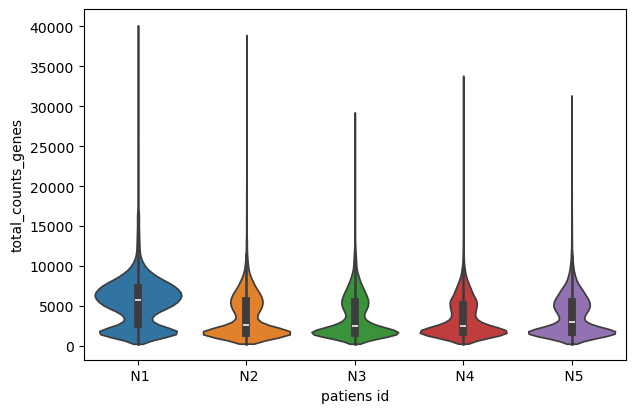

In [48]:
sc.pl.violin(
        adata[:, adata.var['feature_types'] == 'Gene Expression'],
        keys=['total_counts_genes'],
        groupby='patiens_id',
        stripplot=False,
        inner='box',
    );